## corv: A Tutorial

[GitHub Page](https://github.com/vedantchandra/corv)

---

1. [Fitting A DA White Dwarf Without Templates](#da-no-template)
2. [Fitting A DB White Dwarf Without Templates](#db-no-template)

The role of this notebook is to present $\texttt{corv}$. $\texttt{corv}$ determines radial velocities using two methods. First,  

<a id="da-no-template"></a>

**01. Fitting A DA White Dwarf Without Templates (Need to check/proofread)**

---

The following is an example using $\texttt{corv}$ to calculate radial velocities of DA white dwarfs. It does this by isolating a portion of the spectrum around each absorption line. Then, $\texttt{corv}$ generates a model. When fitting without templates, that model consists of the control parameters of each Voigt profile plus a parameter for radial velocity. Then, $\texttt{corv}$ fits each parameter.

In [1]:
import corv
from astroquery.sdss import SDSS
import matplotlib.pyplot as plt

/Users/vedantchandra/0_research/01_sdss5/006_build_corv/data/comm_cat/
star and exposure catalogs not found! check paths and run make_catalogs() if you want to use sdss functionality. otherwise ignore.


We use astroquery to get an example spectrum. This is a good DA white dwarf.

In [2]:
plate = 3650
mjd = 55244
fiberid = 485

spec = SDSS.get_spectra_async(plate=plate, fiberID=fiberid, mjd=mjd)[0].get_fits()

/home/arseneau/anaconda3/lib/python3.9/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [3]:
i = 1

wl = 10**spec[i].data['loglam']
fl = spec[i].data['flux']
ivar = spec[i].data['ivar']

Text(0.5, 1.0, 'White Dwarf Spectrum')

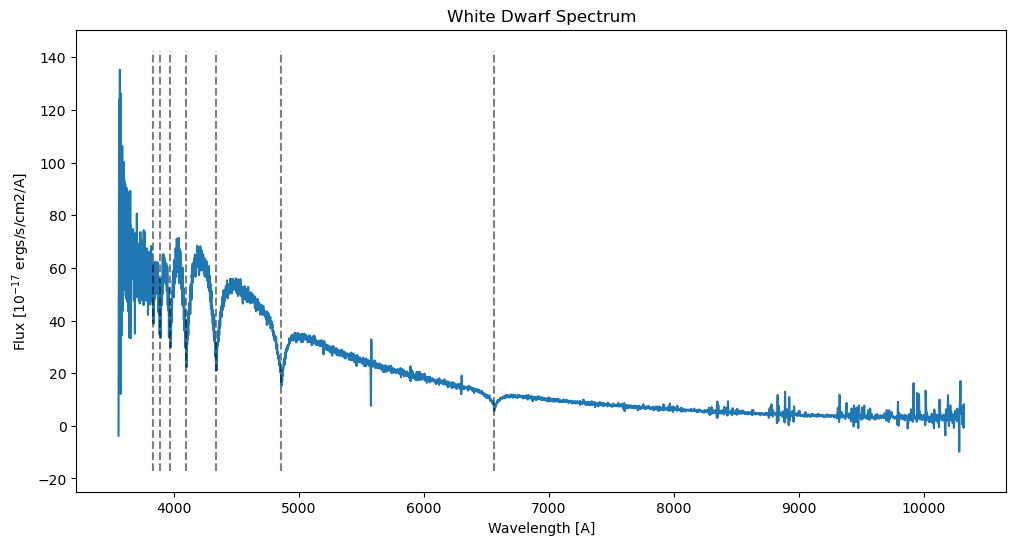

In [4]:
balmer_lines = [6562.79, 4861.35, 4340.47, 4101.73, 3970.07, 3889.06, 3835.40]

plt.figure(figsize=(12,6))

plt.plot(wl, fl)
min_, max_ = plt.ylim()
plt.vlines(balmer_lines, min_, max_, colors = 'black', linestyle = 'dashed', alpha = 0.5)
plt.ylabel(r'Flux [$10^{-17}$ ergs/s/cm2/A]')
plt.xlabel(r'Wavelength [A]')
plt.title('White Dwarf Spectrum')

Now we have the information we need to calculate the RV of this object. We do this by first creating a model and then fitting the model. This can be done in two lines:

`
corvmodel = corv.models.make_balmer_model(nvoigt = 2, names = ['a','b','g','d'])
`

This is the line that creates the model. `nvoigt = 2` tells $\texttt{corv}$ to fit each absorption line using 2 voigt profiles, and `names = ['a', 'b', 'g', 'd']` tells $\texttt{corv}$ to fit radial velocity using the Balmer $\alpha$, $\beta$, $\gamma$, and $\delta$ lines.

`
param_res, rv_res, rv_init = corv.fit.fit_corv(wl, fl, ivar, corvmodel)
`

Next, we fit the model we've created. $\texttt{corv}$ takes wavelength, flux, and ivar as arguments as well as the model. It returns two $\texttt{lmfit}$ objects: `param_res` and `rv_res`, and a float: `rv_init`. $\texttt{corv}$ works in two steps of fitting. First, all parameters are fitted at the same time. These results are returned in `param_res`. Second, every variable except radial velocity is frozen at the values given in `param_res`, and a second round of fitting is performed where only radial velocity is allowed to vary. The final fitted radial velocity is the one given in `rv_res`. `rv_init` is the first guess radial velocity in km/s.

In short: if you want to use $\texttt{corv}$ radial velocities, use the radial velocity from `rv_res`.

In [5]:
corvmodel = corv.models.make_balmer_model(nvoigt = 2, names = ['a','b','g','d'])

param_res, rv_res, rv_init = corv.fit.fit_corv(wl, fl, ivar, corvmodel)

One of $\texttt{corv}$'s utility functions allows us to see how good of a fit we've made. This is the `lineplot` function:

`
corv.utils.lineplot(wl, fl, ivar, corvmodel, rv_res.params, printparams = False, gap = 0.3, figsize = (6, 5))
`

The first three inputs allow plotting of the raw data. `corvmodel` and `rv_res.params` tell $\texttt{corv}$ what model and what parameters for that model to use.

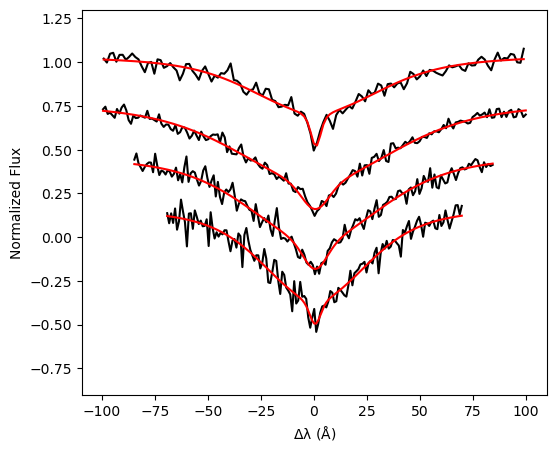

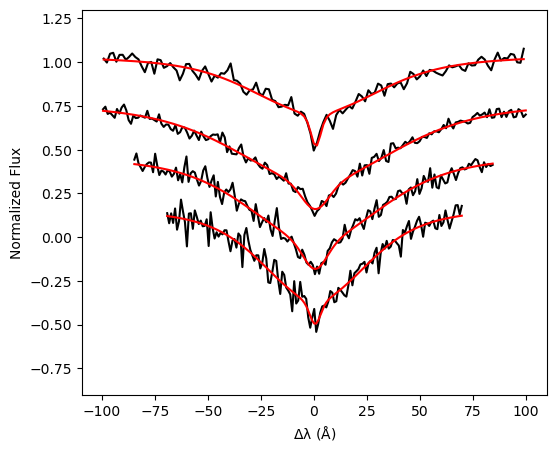

In [6]:
corv.utils.lineplot(wl, fl, ivar, corvmodel, rv_res.params, printparams = False, gap = 0.3, figsize = (6, 5))

In [7]:
rv_res.params['RV']

<Parameter 'RV', value=39.40304695952091 +/- 4.93, bounds=[-2500:2500]>

<a id="db-no-template"></a>

**02. Fitting A DB White Dwarf Without Templates (Need to check/proofread)**

---

We select the target J222711.11+073510.7 from the paper [Spectral Feature Extraction for DB White Dwarfs Through Machine Learning Applied to New Discoveries in the SDSS DR12 and DR14](https://doi.org/10.1088/1538-3873/aac7a8). This is a DB White Dwarf and they obtained a radial velocity of $50 \pm 12$kms$^{-1}$ for this object. Here, we analyse the same object with `corv`.

(0.0, 50.0)

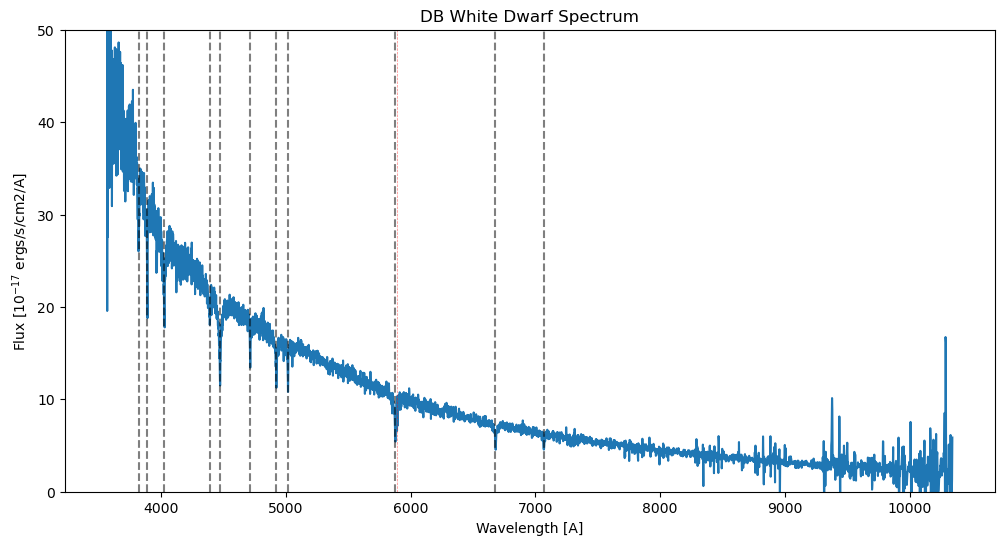

In [8]:
C2_line = [5889]
C2_line = corv.utils.air2vac(C2_line)

He_lines = [3819.607,3888.6489,4026.191,4387.929,4471.479,4713.146,4921.931,5015.678,5875.6148,6678.1517,7065.1771]
He_lines = corv.utils.air2vac(He_lines)

DB = SDSS.get_spectra_async(plate=5057, fiberID=276, mjd=56209)[0].get_fits()

wl_db = 10**DB[1].data['LOGLAM']
fl_db = DB[1].data['FLUX']
ivar_db = DB[1].data['IVAR']

plt.figure(figsize=(12,6))

plt.plot(wl_db, fl_db)
min_, max_ = 0,50
plt.vlines(He_lines, min_, max_, colors = 'black', linestyle = 'dashed', alpha = 0.5)
plt.vlines(C2_line, min_, max_, colors = 'red', linestyle = 'dashed', alpha = 0.5,lw=0.5)
plt.ylabel(r'Flux [$10^{-17}$ ergs/s/cm2/A]')
plt.xlabel(r'Wavelength [A]')
plt.title('DB White Dwarf Spectrum')
#plt.xlim(3600,4100)
plt.ylim(min_,max_)

Now we choose the lines we want to use to determine RV. We first list all the lines, and desired window size and the edge sizes. To choose window size we can plot the spectra and make sure there's no other feature within the window (w.r.t to the centre). To choose the edge size we can make sure the sborption is reasonably within this value and that the continuim can be obtained from rest of it.

We drop all lines below $4000 A$ because of nearby lines. We also drop line at $5879 A$ because of nearby CII line.

We choose to make our own lines using voigt profile with `nvoigt=2`. Ideally, we should use the DB spectral template but we get a very good result even without them.

In [9]:
centre = {'a':He_lines[0],'b':He_lines[1],'c':He_lines[2],'d':He_lines[3],'e':He_lines[4],'f':He_lines[5],\
          'g':He_lines[6],'h':He_lines[7],'i':He_lines[8],'j':He_lines[9],'k':He_lines[10]}
window = {'a':40,'b':40,'c':50,'d':50,'e':50,'f':50,'g':70,'h':70,'i':70,'j':100,'k':100}
edge = {'a':25,'b':25,'c':35,'d':35,'e':35,'f':35,'g':35,'h':35,'i':35,'j':35,'k':35}
name = ['a','b','c','d','e','f','g','h','i','j','k']

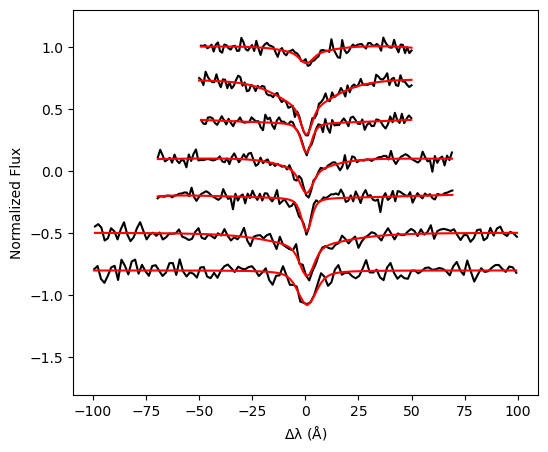

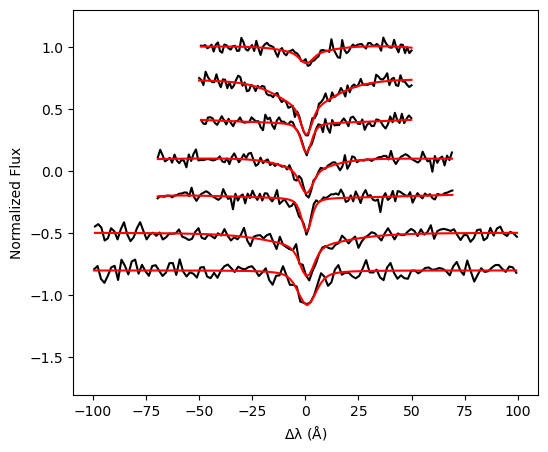

In [11]:
db_model = corv.models.make_balmer_model(nvoigt=2,centres=centre,windows=window,edges=edge,\
                                       names=['d','e','f','g','h','j','k'])

param_res_db, rv_res_db, rv_init = corv.fit.fit_corv(wl_db, fl_db, ivar_db,db_model, iter_teff = False)

corv.utils.lineplot(wl_db, fl_db, ivar_db, db_model, rv_res_db.params, printparams = False, gap = 0.3, figsize = (6, 5))

In [12]:
print(rv_res_db.params['RV'])

<Parameter 'RV', value=37.88247437838618 +/- 2.94, bounds=[-2500:2500]>
